# f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

Определить корни

Найти интервалы, на которых функция возрастает

Найти интервалы, на которых функция убывает

Построить график

Вычислить вершину

Определить промежутки, на котором f > 0

Определить промежутки, на котором f < 0

### Задаем  интервал на отрезке [start; end] с точностью precision(1, 10, 100 и тд)

In [2]:
from sympy import *
from sympy.abc import x

expr = -12*(x**4)*sin(cos(x))-18*x**3+5*x**2+10*x-30
precision = 100
start = -3
end = 3

xs = [x/precision for x in range(start*precision, end*precision + 1)]
ys = [expr.subs(x, value) for value in xs]
points = list(zip(xs, ys))

### Находим корни

In [3]:
solveset(-12*(x**4)*sin(cos(x))-18*x**3+5*x**2+10*x-30, x, domain=Reals)

ConditionSet(x, Eq(-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30, 0), Reals)

### Находим интервалы возрастания и убывания на отрезке [start; end] с точностью precision

In [4]:
points = list(zip(xs, ys))
increasing, decreasing = [], []
flag_increase = True
while len(points) >= 2:
    counter = 0
    if flag_increase:
        while points[counter][0] < end and points[counter + 1][1] > points[counter][1]:
            counter += 1
        if counter != 0:
            increasing.append([points[0][0], points[counter][0]])
        flag_increase = False
    else:
        while points[counter][0] < end and points[counter + 1][1] < points[counter][1]:
            counter += 1
        if counter != 0:
            decreasing.append([points[0][0], points[counter][0]])
        flag_increase = True
    del points[:counter]

print("Интервалы возрастания:")
print(*increasing)
print("Интервалы убывания:")
print(*decreasing)

Интервалы возрастания:
[-0.39, 0.45] [1.7, 3.0]
Интервалы убывания:
[-3.0, -0.39] [0.45, 1.7]


### Строим график на отрезке [-50, 50]

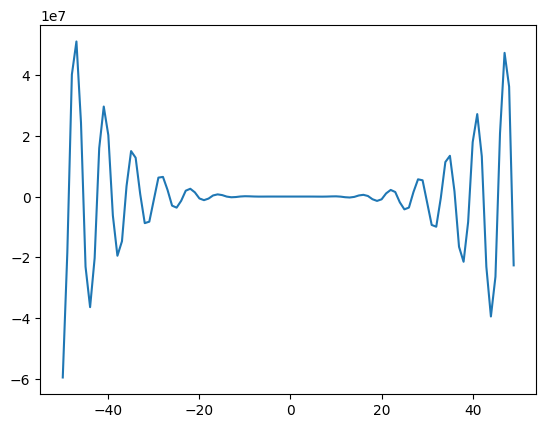

In [13]:
import matplotlib.pyplot as plt

x = [-12*x**4*sin(cos(x))-18*x**3+5*x**2+10*x-30 for x in range(-50, 50)]
y = [y for y in range(-50, 50)]
plt.plot(y, x)
plt.show()

### Находим экстремумы на заданном отрезке

In [6]:
points = list(zip(xs, ys))
extrema = []
flag_incr = True
prior = points[0]
for current in points[1:]:
    if (flag_incr and prior[1] > current[1]) or (not flag_incr and prior[1] < current[1]):
        prior = current
        continue
    else:
        extrema.append(prior)
        prior = current
        flag_incr = not flag_incr

print("Точки экстремума:")
print(*extrema)

Точки экстремума:
(-0.39, -32.2934502471160) (0.45, -26.5133423096216) (1.7, -74.1062343439542)


### Находим промежутки возрастания (f > 0) и убывания (f < 0) функции

In [7]:
points = list(zip(xs, ys))
above, below = [], []
flag_increase = False
while len(points) >= 2:
    counter = 0
    if flag_increase:
        while points[counter][0] < end and points[counter][1] > 0:
            counter += 1
        if counter != 0:
            above.append([points[0][0], points[counter - 2][0]])
        flag_increase = False
    else:
        while points[counter][0] < end and points[counter][1] < 0:
            counter += 1
        if counter != 0:
            below.append([points[0][0], points[counter - 2][0]])
        flag_increase = True
    del points[:counter]

print("Интервалы, на котором f > 0:")
print(*above)
print("Интервалы, на котором f < 0:")
print(*below)

Интервалы, на котором f > 0:
[-3.0, -1.35] [2.28, 2.98]
Интервалы, на котором f < 0:
[-1.33, 2.26]
